## Import pakietów i funkcji

In [2]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.decomposition import PCA

## Wczytanie danych

In [3]:
X_train = pd.read_csv('artifical_train_data.csv')
X_test = pd.read_csv('artifical_test_data.csv')
y_train = pd.read_csv('artifical_train_labels.csv')

## Wstępna analiza danych

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2000 non-null   int64
 1   1       2000 non-null   int64
 2   2       2000 non-null   int64
 3   3       2000 non-null   int64
 4   4       2000 non-null   int64
 5   5       2000 non-null   int64
 6   6       2000 non-null   int64
 7   7       2000 non-null   int64
 8   8       2000 non-null   int64
 9   9       2000 non-null   int64
 10  10      2000 non-null   int64
 11  11      2000 non-null   int64
 12  12      2000 non-null   int64
 13  13      2000 non-null   int64
 14  14      2000 non-null   int64
 15  15      2000 non-null   int64
 16  16      2000 non-null   int64
 17  17      2000 non-null   int64
 18  18      2000 non-null   int64
 19  19      2000 non-null   int64
 20  20      2000 non-null   int64
 21  21      2000 non-null   int64
 22  22      2000 non-null   int64
 23  23      2000 

In [5]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,514.450000,488.665000,477.888000,488.793000,507.522500,499.658500,478.436500,489.607500,495.38450,512.823500,...,504.674000,482.099500,485.000500,479.121000,498.843500,479.587500,500.472000,477.593500,481.42600,480.398000
std,42.190645,14.278821,11.473808,40.446955,36.961528,28.798395,7.785967,14.569474,19.34745,43.284502,...,40.995403,11.934899,43.010678,11.505153,53.677655,51.313223,96.954852,9.268938,113.46729,44.456189
min,362.000000,427.000000,442.000000,335.000000,371.000000,415.000000,453.000000,433.000000,424.00000,350.000000,...,378.000000,441.000000,367.000000,435.000000,333.000000,317.000000,207.000000,450.000000,84.00000,347.000000
25%,485.000000,479.000000,470.000000,460.750000,483.000000,480.000000,473.000000,480.000000,482.00000,484.000000,...,477.000000,474.000000,449.000000,471.000000,454.000000,435.000000,433.750000,470.000000,398.75000,451.000000
50%,513.000000,489.000000,477.000000,489.000000,507.000000,499.000000,478.000000,490.000000,495.00000,512.000000,...,504.000000,482.000000,485.000000,479.000000,498.500000,480.000000,496.000000,478.000000,487.50000,480.000000
75%,543.000000,498.000000,486.000000,515.000000,531.000000,518.000000,483.000000,499.000000,508.00000,542.000000,...,532.000000,490.000000,521.000000,487.000000,543.000000,522.000000,568.000000,485.000000,562.00000,512.000000
max,668.000000,537.000000,514.000000,661.000000,642.000000,606.000000,506.000000,536.000000,561.00000,680.000000,...,654.000000,528.000000,614.000000,516.000000,653.000000,646.000000,829.000000,505.000000,807.00000,621.000000


In [6]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       600 non-null    int64
 1   1       600 non-null    int64
 2   2       600 non-null    int64
 3   3       600 non-null    int64
 4   4       600 non-null    int64
 5   5       600 non-null    int64
 6   6       600 non-null    int64
 7   7       600 non-null    int64
 8   8       600 non-null    int64
 9   9       600 non-null    int64
 10  10      600 non-null    int64
 11  11      600 non-null    int64
 12  12      600 non-null    int64
 13  13      600 non-null    int64
 14  14      600 non-null    int64
 15  15      600 non-null    int64
 16  16      600 non-null    int64
 17  17      600 non-null    int64
 18  18      600 non-null    int64
 19  19      600 non-null    int64
 20  20      600 non-null    int64
 21  21      600 non-null    int64
 22  22      600 non-null    int64
 23  23      600 non

Nie ma braków danych, wszystkie zmienne są numeryczne.

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSub

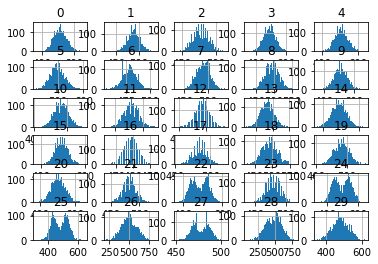

In [7]:
X_train.hist(sharex = False, sharey = False, bins = 50)

Podzielimy nasz zbiór treningowy na nowe zbiory: treningowy i testowy w proporcji 9:1.

In [8]:
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, 
                                                                            random_state = 320584, test_size = 0.1)

## Selekcja zmiennych (PCA)

Sprawdzamy, ile zmiennych okaże się zbędnych.

In [ ]:
nums = np.arange(31)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(X_train_train)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

In [ ]:
sns.lineplot(x = nums, y = var_ratio).set(xlabel = "n_components", ylabel = "explained_variance_ratio_")
plt.grid()
plt.show()

In [ ]:
np.argmax(np.array(var_ratio) > 0.95)

In [ ]:
pca = PCA(n_components = 15)
X_train_train_pca = pca.fit_transform(X_train_train)
X_train_test_pca = pca.transform(X_train_test)

## Wybór modelu

In [9]:
modeliki = []
punkciki = []

#### Model 1

In [10]:
bagging_kneighbors50 = BaggingClassifier(base_estimator = KNeighborsClassifier(), 
                                  n_estimators = 50, random_state = 320584)

In [11]:
bagging_kneighbors50.fit(X_train_train, y_train_train["0"])

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50,
                  random_state=320584)

In [12]:
modeliki.append("BaggingClassifier50KNN")
modeliki

['BaggingClassifier50KNN']

In [13]:
y_train_train_pred1 = bagging_kneighbors50.predict(X_train_train)
y_train_test_pred1 = bagging_kneighbors50.predict(X_train_test)

In [14]:
print(f"Na części treningowej: {balanced_accuracy_score(y_train_train, y_train_train_pred1)}")
print(f"Na części testowej: {balanced_accuracy_score(y_train_test, y_train_test_pred1)}")

Na części treningowej: 0.8497516418308497
Na części testowej: 0.7680713781631213


In [15]:
punkciki.append(balanced_accuracy_score(y_train_test, y_train_test_pred1))
punkciki

[0.7680713781631213]

#### Model 2

In [16]:
params = {
    'base_estimator__n_neighbors': [3, 4, 5, 6, 7, 9, 11]
    }

In [17]:
grid = GridSearchCV(bagging_kneighbors50, cv = 3,
                             param_grid = params, scoring = 'balanced_accuracy')

In [18]:
grid.fit(X_train_train, y_train_train["0"])

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(),
                                         n_estimators=50, random_state=320584),
             param_grid={'base_estimator__n_neighbors': [3, 4, 5, 6, 7, 9, 11]},
             scoring='balanced_accuracy')

In [19]:
grid.best_params_

{'base_estimator__n_neighbors': 11}

In [20]:
modeliki.append("BaggingClassifier50KNNGridSearch")
modeliki

['BaggingClassifier50KNN', 'BaggingClassifier50KNNGridSearch']

In [21]:
y_train_train_pred2 = grid.predict(X_train_train)
y_train_test_pred2 = grid.predict(X_train_test)

In [22]:
print(f"Na części treningowej: {balanced_accuracy_score(y_train_train, y_train_train_pred2)}")
print(f"Na części testowej: {balanced_accuracy_score(y_train_test, y_train_test_pred2)}")

Na części treningowej: 0.8052916402751387
Na części testowej: 0.7552676681117048


In [23]:
punkciki.append(balanced_accuracy_score(y_train_test, y_train_test_pred2))
punkciki

[0.7680713781631213, 0.7552676681117048]

#### Model 3

In [24]:
las = RandomForestClassifier(random_state = 320584)

In [25]:
las.fit(X_train_train, y_train_train["0"])

RandomForestClassifier(random_state=320584)

In [26]:
modeliki.append("RandomForest")
modeliki

['BaggingClassifier50KNN', 'BaggingClassifier50KNNGridSearch', 'RandomForest']

In [27]:
y_train_train_pred3 = las.predict(X_train_train)
y_train_test_pred3 = las.predict(X_train_test)

In [28]:
print(f"Na części treningowej: {balanced_accuracy_score(y_train_train, y_train_train_pred3)}")
print(f"Na części testowej: {balanced_accuracy_score(y_train_test, y_train_test_pred3)}")

Na części treningowej: 1.0
Na części testowej: 0.8497328359713681


In [29]:
punkciki.append(balanced_accuracy_score(y_train_test, y_train_test_pred3))
punkciki

[0.7680713781631213, 0.7552676681117048, 0.8497328359713681]

#### Model 4

In [30]:
params_rf = {
    'n_estimators': [100, 200, 300, 400, 500]
    }

In [31]:
 grid_rf= GridSearchCV(las, cv = 3, param_grid = params_rf, scoring = 'balanced_accuracy')

In [32]:
grid_rf.fit(X_train_train, y_train_train["0"])

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=320584),
             param_grid={'n_estimators': [100, 200, 300, 400, 500]},
             scoring='balanced_accuracy')

In [33]:
grid_rf.best_params_

{'n_estimators': 200}

In [34]:
modeliki.append("RandomForestGridSearch")
modeliki

['BaggingClassifier50KNN',
 'BaggingClassifier50KNNGridSearch',
 'RandomForest',
 'RandomForestGridSearch']

In [35]:
y_train_train_pred4 = grid_rf.predict(X_train_train)
y_train_test_pred4 = grid_rf.predict(X_train_test)

In [36]:
print(f"Na części treningowej: {balanced_accuracy_score(y_train_train, y_train_train_pred4)}")
print(f"Na części testowej: {balanced_accuracy_score(y_train_test, y_train_test_pred4)}")

Na części treningowej: 1.0
Na części testowej: 0.8295695130557517


In [37]:
punkciki.append(balanced_accuracy_score(y_train_test, y_train_test_pred4))
punkciki

[0.7680713781631213,
 0.7552676681117048,
 0.8497328359713681,
 0.8295695130557517]

#### Model 5

In [38]:
extra = ExtraTreesClassifier(random_state = 320584)

In [39]:
extra.fit(X_train_train, y_train_train["0"])

ExtraTreesClassifier(random_state=320584)

In [40]:
modeliki.append("ExtraTrees")
modeliki

['BaggingClassifier50KNN',
 'BaggingClassifier50KNNGridSearch',
 'RandomForest',
 'RandomForestGridSearch',
 'ExtraTrees']

In [41]:
y_train_train_pred5 = extra.predict(X_train_train)
y_train_test_pred5 = extra.predict(X_train_test)

In [42]:
print(f"Na części treningowej: {balanced_accuracy_score(y_train_train, y_train_train_pred5)}")
print(f"Na części testowej: {balanced_accuracy_score(y_train_test, y_train_test_pred5)}")

Na części treningowej: 1.0
Na części testowej: 0.8470107873777599


In [43]:
punkciki.append(balanced_accuracy_score(y_train_test, y_train_test_pred5))
punkciki

[0.7680713781631213,
 0.7552676681117048,
 0.8497328359713681,
 0.8295695130557517,
 0.8470107873777599]

#### Model 6

In [44]:
gradient = GradientBoostingClassifier(random_state = 320584)

In [45]:
gradient.fit(X_train_train, y_train_train["0"])

GradientBoostingClassifier(random_state=320584)

In [46]:
modeliki.append("GradientBoosting")
modeliki

['BaggingClassifier50KNN',
 'BaggingClassifier50KNNGridSearch',
 'RandomForest',
 'RandomForestGridSearch',
 'ExtraTrees',
 'GradientBoosting']

In [47]:
y_train_train_pred6 = gradient.predict(X_train_train)
y_train_test_pred6 = gradient.predict(X_train_test)

In [48]:
print(f"Na części treningowej: {balanced_accuracy_score(y_train_train, y_train_train_pred6)}")
print(f"Na części testowej: {balanced_accuracy_score(y_train_test, y_train_test_pred6)}")

Na części treningowej: 0.9111911191119112
Na części testowej: 0.8341062607117653


In [49]:
punkciki.append(balanced_accuracy_score(y_train_test, y_train_test_pred6))
punkciki

[0.7680713781631213,
 0.7552676681117048,
 0.8497328359713681,
 0.8295695130557517,
 0.8470107873777599,
 0.8341062607117653]

#### Model 7

In [50]:
clf1 = LogisticRegression(random_state = 320584, max_iter = 1000)
clf2 = RandomForestClassifier(random_state = 320584)
clf3 = KNeighborsClassifier()

In [51]:
glosy = VotingClassifier(estimators=[('lr', clf1),
                             ('rf', clf2),
                             ('knn', clf3)])

In [52]:
glosy.fit(X_train_train, y_train_train["0"])

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=320584)),
                             ('rf',
                              RandomForestClassifier(random_state=320584)),
                             ('knn', KNeighborsClassifier())])

In [53]:
modeliki.append("Voting")
modeliki

['BaggingClassifier50KNN',
 'BaggingClassifier50KNNGridSearch',
 'RandomForest',
 'RandomForestGridSearch',
 'ExtraTrees',
 'GradientBoosting',
 'Voting']

In [54]:
y_train_train_pred7 = glosy.predict(X_train_train)
y_train_test_pred7 = glosy.predict(X_train_test)

In [55]:
print(f"Na części treningowej: {balanced_accuracy_score(y_train_train, y_train_train_pred7)}")
print(f"Na części testowej: {balanced_accuracy_score(y_train_test, y_train_test_pred7)}")

Na części treningowej: 0.905973930726406
Na części testowej: 0.794686964411735


In [56]:
punkciki.append(balanced_accuracy_score(y_train_test, y_train_test_pred7))
punkciki

[0.7680713781631213,
 0.7552676681117048,
 0.8497328359713681,
 0.8295695130557517,
 0.8470107873777599,
 0.8341062607117653,
 0.794686964411735]

### Podsumowanie 

In [57]:
results = pd.DataFrame({'model' : modeliki,
                        'bal_acc' : punkciki })

In [58]:
results_sorted = results.sort_values(by = 'bal_acc')
results_sorted

,model,bal_acc
1,BaggingClassifier50KNNGridSearch,0.755268
0,BaggingClassifier50KNN,0.768071
6,Voting,0.794687
3,RandomForestGridSearch,0.829570
5,GradientBoosting,0.834106
4,ExtraTrees,0.847011
2,RandomForest,0.849733


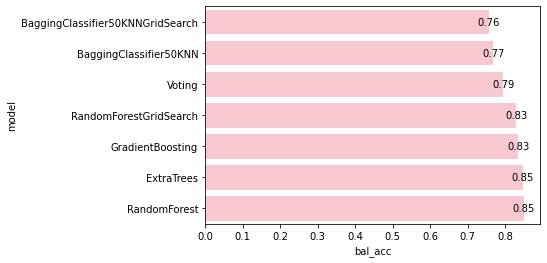

In [59]:
plot = sns.barplot(x = results_sorted.bal_acc, y = results_sorted.model, color = 'pink')
for index, value in enumerate(results_sorted['bal_acc']):
    plot.text(value, index, f'{value:.2f}', color='black', ha="center", va="center")
plt.savefig("wykres.pdf", format = "pdf", bbox_inches="tight")
plt.show()

Będziemy skupiać się na ulepszaniu modelu RandomForest oraz ExtraTrees.

### RandomForest

Zbudujemy teraz ten model na wybranych zmiennych, nie na pełnych danych.

In [60]:
las = RandomForestClassifier(random_state = 320584)

In [61]:
las.fit(X_train_train, y_train_train["0"])

RandomForestClassifier(random_state=320584)

In [62]:
sfs = SequentialFeatureSelector(las, scoring='balanced_accuracy', cv=3)

X_train_train_selected = sfs.fit_transform(X_train_train, y_train_train["0"])
X_train_test_selected = sfs.transform(X_train_test)

In [66]:
pd.DataFrame(X_train_train_selected).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1800 non-null   int64
 1   1       1800 non-null   int64
 2   2       1800 non-null   int64
 3   3       1800 non-null   int64
 4   4       1800 non-null   int64
 5   5       1800 non-null   int64
 6   6       1800 non-null   int64
 7   7       1800 non-null   int64
 8   8       1800 non-null   int64
 9   9       1800 non-null   int64
 10  10      1800 non-null   int64
 11  11      1800 non-null   int64
 12  12      1800 non-null   int64
 13  13      1800 non-null   int64
 14  14      1800 non-null   int64
dtypes: int64(15)
memory usage: 211.1 KB


In [67]:
las.fit(X_train_train_selected, y_train_train["0"])

RandomForestClassifier(random_state=320584)

In [68]:
y_train_train_pred9 = las.predict(X_train_train_selected)
y_train_test_pred9 = las.predict(X_train_test_selected)

In [69]:
print(f"Na części treningowej: {balanced_accuracy_score(y_train_train, y_train_train_pred9)}")
print(f"Na części testowej: {balanced_accuracy_score(y_train_test, y_train_test_pred9)}")

Na części treningowej: 1.0
Na części testowej: 0.8872870249017037


In [70]:
las2 = RandomForestClassifier(random_state = 320584)

In [71]:
las2.fit(X_train_train, y_train_train["0"])

RandomForestClassifier(random_state=320584)

In [72]:
sfm = SelectFromModel(las2)

In [73]:
X_train_train_selected = sfm.fit_transform(X_train_train, y_train_train["0"])
X_train_test_selected = sfm.transform(X_train_test)

In [75]:
pd.DataFrame(X_train_train_selected).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1800 non-null   int64
 1   1       1800 non-null   int64
 2   2       1800 non-null   int64
 3   3       1800 non-null   int64
 4   4       1800 non-null   int64
 5   5       1800 non-null   int64
 6   6       1800 non-null   int64
 7   7       1800 non-null   int64
dtypes: int64(8)
memory usage: 112.6 KB


In [76]:
las2.fit(X_train_train_selected, y_train_train["0"])

RandomForestClassifier(random_state=320584)

In [77]:
y_train_train_pred10 = las2.predict(X_train_train_selected)
y_train_test_pred10 = las2.predict(X_train_test_selected)

In [78]:
print(f"Na części treningowej: {balanced_accuracy_score(y_train_train, y_train_train_pred10)}")
print(f"Na części testowej: {balanced_accuracy_score(y_train_test, y_train_test_pred10)}")

Na części treningowej: 1.0
Na części testowej: 0.9019558423228149


### ExtraTrees

In [79]:
extra = ExtraTreesClassifier(random_state = 320584)

In [80]:
extra.fit(X_train_train, y_train_train["0"])

ExtraTreesClassifier(random_state=320584)

In [81]:
sfs = SequentialFeatureSelector(extra, scoring='balanced_accuracy', cv=3)

X_train_train_selected = sfs.fit_transform(X_train_train, y_train_train["0"])
X_train_test_selected = sfs.transform(X_train_test)

In [82]:
pd.DataFrame(X_train_train_selected).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1800 non-null   int64
 1   1       1800 non-null   int64
 2   2       1800 non-null   int64
 3   3       1800 non-null   int64
 4   4       1800 non-null   int64
 5   5       1800 non-null   int64
 6   6       1800 non-null   int64
 7   7       1800 non-null   int64
 8   8       1800 non-null   int64
 9   9       1800 non-null   int64
 10  10      1800 non-null   int64
 11  11      1800 non-null   int64
 12  12      1800 non-null   int64
 13  13      1800 non-null   int64
 14  14      1800 non-null   int64
dtypes: int64(15)
memory usage: 211.1 KB


In [83]:
extra.fit(X_train_train_selected, y_train_train["0"])

ExtraTreesClassifier(random_state=320584)

In [84]:
y_train_train_pred11 = extra.predict(X_train_train_selected)
y_train_test_pred11 = extra.predict(X_train_test_selected)

In [85]:
print(f"Na części treningowej: {balanced_accuracy_score(y_train_train, y_train_train_pred11)}")
print(f"Na części testowej: {balanced_accuracy_score(y_train_test, y_train_test_pred11)}")

Na części treningowej: 1.0
Na części testowej: 0.8653090029236818


In [86]:
extra2 = ExtraTreesClassifier(random_state = 320584)

In [87]:
extra2.fit(X_train_train, y_train_train["0"])

ExtraTreesClassifier(random_state=320584)

In [88]:
sfm = SelectFromModel(extra2)

In [89]:
X_train_train_selected = sfm.fit_transform(X_train_train, y_train_train["0"])
X_train_test_selected = sfm.transform(X_train_test)

In [90]:
pd.DataFrame(X_train_train_selected).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1800 non-null   int64
 1   1       1800 non-null   int64
 2   2       1800 non-null   int64
 3   3       1800 non-null   int64
 4   4       1800 non-null   int64
 5   5       1800 non-null   int64
 6   6       1800 non-null   int64
 7   7       1800 non-null   int64
dtypes: int64(8)
memory usage: 112.6 KB


In [91]:
extra2.fit(X_train_train_selected, y_train_train["0"])

ExtraTreesClassifier(random_state=320584)

In [92]:
y_train_train_pred12 = extra2.predict(X_train_train_selected)
y_train_test_pred12 = extra2.predict(X_train_test_selected)

In [93]:
print(f"Na części treningowej: {balanced_accuracy_score(y_train_train, y_train_train_pred12)}")
print(f"Na części testowej: {balanced_accuracy_score(y_train_test, y_train_test_pred12)}")

Na części treningowej: 1.0
Na części testowej: 0.8936888799274121


## Ostateczny model

In [94]:
forest_best = RandomForestClassifier(random_state = 320584)
forest_best.fit(X_train_train, y_train_train["0"])
sfm = SelectFromModel(forest_best)
X_train_train_selected = sfm.fit_transform(X_train_train, y_train_train["0"])
X_train_test_selected = sfm.transform(X_train_test)
forest_best.fit(X_train_train_selected, y_train_train["0"])
y_train_train_pred_best = forest_best.predict(X_train_train_selected)
y_train_test_pred_best = forest_best.predict(X_train_test_selected)
print(f"Na części treningowej: {balanced_accuracy_score(y_train_train, y_train_train_pred_best)}")
print(f"Na części testowej: {balanced_accuracy_score(y_train_test, y_train_test_pred_best)}")

Na części treningowej: 1.0
Na części testowej: 0.9019558423228149


## Dopasowanie modelu do całych danych treningowych

In [98]:
forest_all = RandomForestClassifier(random_state = 320584)
forest_all.fit(X_train, y_train["0"])
sfm2 = SelectFromModel(forest_all)
X_train_sel = sfm2.fit_transform(X_train, y_train["0"])
forest_all.fit(X_train_sel, y_train["0"])
y_train_pred = forest_all.predict(X_train_sel)
print(f"Na części treningowej: {balanced_accuracy_score(y_train, y_train_pred)}")

Na części treningowej: 1.0


## Predykcja na prawdziwym zbiorze testowym

In [99]:
X_test_sel = sfm2.transform(X_test)

In [100]:
prawdopodobienstwa = forest_all.predict_proba(X_test_sel)[:, 1]

In [101]:
nazwa_pliku = "320584_artifical_prediction.txt"

with open(nazwa_pliku, 'w') as plik:
    plik.write("320584" + '\n')
    for pstwo in prawdopodobienstwa:
        plik.write(str(pstwo) + '\n')